In [1]:
import pandas as pd
df=pd.read_csv("Crimes_-_2001_to_Present_20251113.csv")

In [2]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,14020403,JJ477662,11/04/2025 12:00:00 AM,091XX S ESSEX AVE,0560,ASSAULT,SIMPLE,RESIDENCE,False,True,...,7.0,48.0,08A,1194425.0,1844840.0,2025,11/11/2025 03:41:33 PM,41.729168,-87.563358,"(41.729167666, -87.563357811)"
1,14018928,JJ477018,11/04/2025 12:00:00 AM,069XX N WAYNE AVE,0930,MOTOR VEHICLE THEFT,THEFT / RECOVERY - AUTOMOBILE,STREET,False,False,...,49.0,1.0,07,1165891.0,1945855.0,2025,11/11/2025 03:41:33 PM,42.007014,-87.665004,"(42.007014318, -87.665003694)"
2,14018722,JJ476993,11/04/2025 12:00:00 AM,018XX N RICHMOND ST,0710,THEFT,THEFT FROM MOTOR VEHICLE,STREET,False,False,...,26.0,22.0,06,1156524.0,1912177.0,2025,11/11/2025 03:41:33 PM,41.914795,-87.700382,"(41.914795379, -87.700381792)"
3,14020328,JJ478986,11/04/2025 12:00:00 AM,064XX S LOWE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,20.0,68.0,08A,1173144.0,1862203.0,2025,11/11/2025 03:41:33 PM,41.777310,-87.640803,"(41.777309867, -87.640802922)"
4,14021256,JJ480082,11/04/2025 12:00:00 AM,076XX S PERRY AVE,0710,THEFT,THEFT FROM MOTOR VEHICLE,VEHICLE - COMMERCIAL,False,False,...,6.0,69.0,06,1176715.0,1854363.0,2025,11/11/2025 03:41:33 PM,41.755716,-87.627947,"(41.755716369, -87.627947437)"


In [3]:
df.shape

(8440409, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8440409 entries, 0 to 8440408
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [5]:
missing_values=df.isnull().sum()
print(missing_values)

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     15115
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614820
Community Area          613685
FBI Code                     0
X Coordinate             94041
Y Coordinate             94041
Year                         0
Updated On                   0
Latitude                 94041
Longitude                94041
Location                 94041
dtype: int64


In [6]:
missing_value=df.isnull().sum()
print(missing_value[missing_value>0])

print(f"Total missing values: {df.isnull().sum().sum()}")

print(f"Percentage of missing data: {df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100:.2f}%")

Location Description     15115
District                    47
Ward                    614820
Community Area          613685
X Coordinate             94041
Y Coordinate             94041
Latitude                 94041
Longitude                94041
Location                 94041
dtype: int64
Total missing values: 1713872
Percentage of missing data: 0.92%


In [7]:
# 11/04/2025 12:00:00 AM  its in MM/DD//YYYY FORMAT

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
print(df["Date"].isnull().sum())

0


In [8]:
# sorting a 500000 sample for analysis
sample_df = df.sort_values(by="Date", ascending=False).head(500000)
sample_df.head()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,14020403,JJ477662,2025-11-04,091XX S ESSEX AVE,0560,ASSAULT,SIMPLE,RESIDENCE,False,True,...,7.0,48.0,08A,1194425.0,1844840.0,2025,11/11/2025 03:41:33 PM,41.729168,-87.563358,"(41.729167666, -87.563357811)"
10,14018617,JJ476833,2025-11-04,064XX S MOBILE AVE,0810,THEFT,OVER $500,DRIVEWAY - RESIDENTIAL,False,False,...,13.0,64.0,06,1135529.0,1861211.0,2025,11/11/2025 03:41:33 PM,41.775336,-87.778725,"(41.775336129, -87.778724925)"
18,14018572,JJ476729,2025-11-04,066XX S WOODLAWN AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE,False,False,...,20.0,42.0,14,1185358.0,1861195.0,2025,11/11/2025 03:41:33 PM,41.774265,-87.596059,"(41.774265187, -87.596058633)"
17,14018432,JJ476549,2025-11-04,002XX E 71ST ST,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,False,...,6.0,69.0,08A,1178969.0,1857991.0,2025,11/11/2025 03:41:33 PM,41.765621,-87.619577,"(41.765620989, -87.619576803)"
16,14020159,JJ478541,2025-11-04,013XX S MICHIGAN AVE,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,3.0,33.0,26,1177436.0,1894247.0,2025,11/11/2025 03:41:33 PM,41.865145,-87.624099,"(41.865145359, -87.624098901)"


In [9]:
#reseting the index
sample_df = sample_df.reset_index(drop=True)
sample_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,14020403,JJ477662,2025-11-04,091XX S ESSEX AVE,0560,ASSAULT,SIMPLE,RESIDENCE,False,True,...,7.0,48.0,08A,1194425.0,1844840.0,2025,11/11/2025 03:41:33 PM,41.729168,-87.563358,"(41.729167666, -87.563357811)"
1,14018617,JJ476833,2025-11-04,064XX S MOBILE AVE,0810,THEFT,OVER $500,DRIVEWAY - RESIDENTIAL,False,False,...,13.0,64.0,06,1135529.0,1861211.0,2025,11/11/2025 03:41:33 PM,41.775336,-87.778725,"(41.775336129, -87.778724925)"
2,14018572,JJ476729,2025-11-04,066XX S WOODLAWN AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE,False,False,...,20.0,42.0,14,1185358.0,1861195.0,2025,11/11/2025 03:41:33 PM,41.774265,-87.596059,"(41.774265187, -87.596058633)"
3,14018432,JJ476549,2025-11-04,002XX E 71ST ST,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,False,...,6.0,69.0,08A,1178969.0,1857991.0,2025,11/11/2025 03:41:33 PM,41.765621,-87.619577,"(41.765620989, -87.619576803)"
4,14020159,JJ478541,2025-11-04,013XX S MICHIGAN AVE,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,3.0,33.0,26,1177436.0,1894247.0,2025,11/11/2025 03:41:33 PM,41.865145,-87.624099,"(41.865145359, -87.624098901)"


In [10]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    500000 non-null  int64         
 1   Case Number           500000 non-null  object        
 2   Date                  500000 non-null  datetime64[ns]
 3   Block                 500000 non-null  object        
 4   IUCR                  500000 non-null  object        
 5   Primary Type          500000 non-null  object        
 6   Description           500000 non-null  object        
 7   Location Description  497881 non-null  object        
 8   Arrest                500000 non-null  bool          
 9   Domestic              500000 non-null  bool          
 10  Beat                  500000 non-null  int64         
 11  District              500000 non-null  float64       
 12  Ward                  499999 non-null  float64       
 13 

In [11]:

sample_missing_value=sample_df.isnull().sum()
print(sample_missing_value)

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    2119
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       1
Community Area             1
FBI Code                   0
X Coordinate            2093
Y Coordinate            2093
Year                       0
Updated On                 0
Latitude                2093
Longitude               2093
Location                2093
dtype: int64


In [12]:
sample_df["Location Description"]=sample_df["Location Description"].fillna(sample_df["Location Description"].mode()[0])

sample_df["Location Description"].isnull().sum()

np.int64(0)

In [13]:
sample_df["Location Description"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 500000 entries, 0 to 499999
Series name: Location Description
Non-Null Count   Dtype 
--------------   ----- 
500000 non-null  object
dtypes: object(1)
memory usage: 3.8+ MB


In [14]:
#dropping the location column as we have aleady a latitude and longitude

sample_df=sample_df.drop(columns="Location")

In [15]:
# knn imputation
from sklearn.impute import KNNImputer

features = [ "Ward", "Community Area",
            "X Coordinate", "Y Coordinate",
            "Latitude", "Longitude"]

imputer = KNNImputer(n_neighbors=5)

sample_df[features] = imputer.fit_transform(sample_df[features])


In [16]:
sample_df["Updated On"] = pd.to_datetime(sample_df["Updated On"], format="%m/%d/%Y %I:%M:%S %p", errors="coerce")


In [17]:
sample_df["Updated On"].dtype


dtype('<M8[ns]')

In [18]:
# i am doing some feature engineering with the dates
sample_df["Updated_Year"]  = sample_df["Updated On"].dt.year
sample_df["Updated_Month"] = sample_df["Updated On"].dt.month
sample_df["Updated_Day"]   = sample_df["Updated On"].dt.day
sample_df["Update_Lag"]    = (sample_df["Updated On"] - sample_df["Date"]).dt.total_seconds()


In [19]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    500000 non-null  int64         
 1   Case Number           500000 non-null  object        
 2   Date                  500000 non-null  datetime64[ns]
 3   Block                 500000 non-null  object        
 4   IUCR                  500000 non-null  object        
 5   Primary Type          500000 non-null  object        
 6   Description           500000 non-null  object        
 7   Location Description  500000 non-null  object        
 8   Arrest                500000 non-null  bool          
 9   Domestic              500000 non-null  bool          
 10  Beat                  500000 non-null  int64         
 11  District              500000 non-null  float64       
 12  Ward                  500000 non-null  float64       
 13 

In [20]:
sample_df["IUCR"].str.len().value_counts()

IUCR
4    500000
Name: count, dtype: int64

In [21]:
sample_df.duplicated().sum()
# hence there is no more null value and we can go froward with the EDA part



np.int64(0)

In [22]:
sample_df["Primary Type"].unique()

array(['ASSAULT', 'THEFT', 'CRIMINAL DAMAGE', 'OTHER OFFENSE', 'BURGLARY',
       'BATTERY', 'DECEPTIVE PRACTICE', 'MOTOR VEHICLE THEFT',
       'NARCOTICS', 'ROBBERY', 'WEAPONS VIOLATION', 'CRIMINAL TRESPASS',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PUBLIC PEACE VIOLATION',
       'CRIMINAL SEXUAL ASSAULT', 'SEX OFFENSE',
       'OFFENSE INVOLVING CHILDREN', 'STALKING', 'ARSON', 'INTIMIDATION',
       'HOMICIDE', 'PUBLIC INDECENCY', 'GAMBLING',
       'CONCEALED CARRY LICENSE VIOLATION', 'LIQUOR LAW VIOLATION',
       'PROSTITUTION', 'OBSCENITY', 'KIDNAPPING', 'HUMAN TRAFFICKING',
       'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL'], dtype=object)

# EDA


C:\Users\offic\AppData\Local\Temp\ipykernel_13960\330542336.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=report, x="Primary Type", y="Reported Crime", palette="magma")


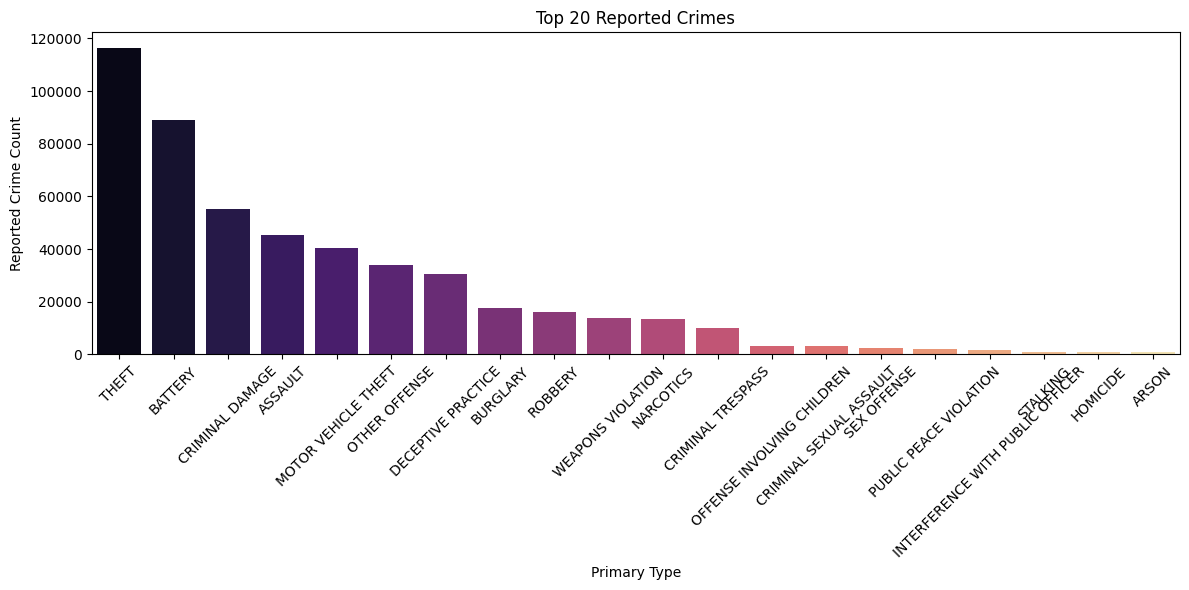

In [23]:
#analysing crime distribution across 33 different types category
import seaborn as sns
import matplotlib.pyplot as plt


Reported_Crime = sample_df.groupby("Primary Type")["ID"].count().reset_index(name="Reported Crime")


report = Reported_Crime.sort_values("Reported Crime", ascending=False).head(20)


plt.figure(figsize=(12, 6))
sns.barplot(data=report, x="Primary Type", y="Reported Crime", palette="magma")
plt.xticks(rotation=45)
plt.title("Top 20 Reported Crimes")
plt.xlabel("Primary Type")
plt.ylabel("Reported Crime Count")
plt.tight_layout()
plt.show()



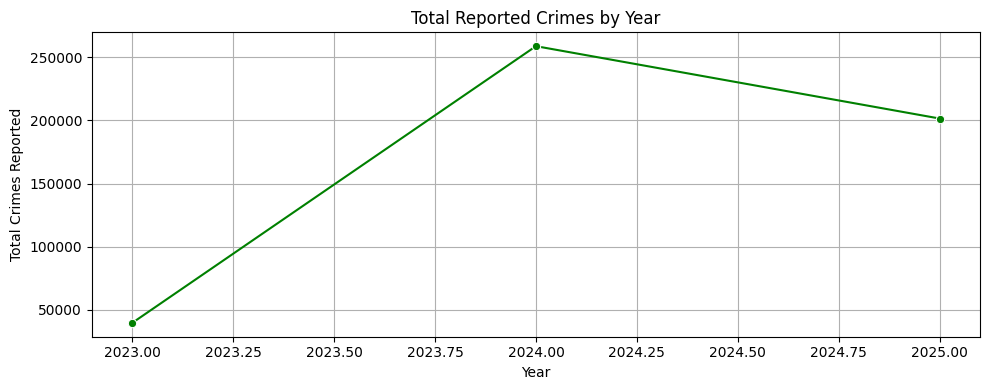

In [24]:
# reported crime with the year

crime_yearly = sample_df.groupby("Year")["ID"].count().reset_index(name="Total Crimes")

crime_yearly = crime_yearly.sort_values("Year")


plt.figure(figsize=(10, 4))
sns.lineplot(data=crime_yearly, x="Year", y="Total Crimes", marker="o",color="green")
plt.title("Total Reported Crimes by Year")
plt.xlabel("Year")
plt.ylabel("Total Crimes Reported")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\offic\AppData\Local\Temp\ipykernel_13960\1132501328.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=report_result, x="Arrest", y="Total_Reported_Crime",palette="inferno")


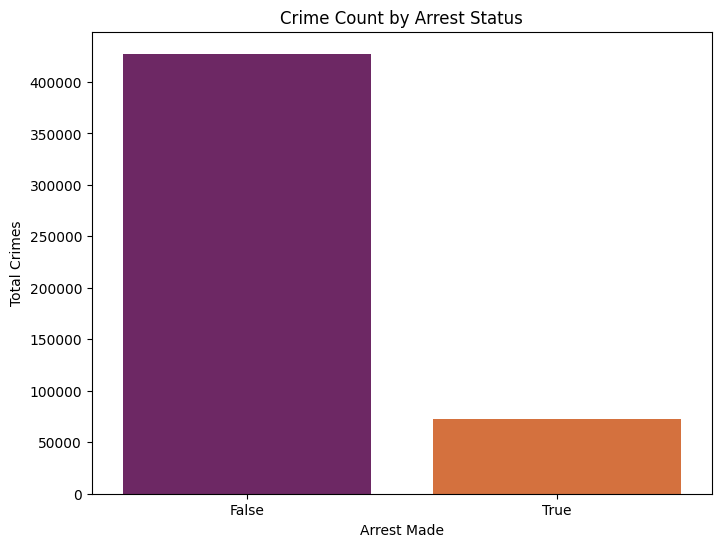

In [25]:
#report crime vs arrest made

report_result = sample_df.groupby("Arrest")["ID"].count().reset_index(name="Total_Reported_Crime")


plt.figure(figsize=(8, 6))
sns.barplot(data=report_result, x="Arrest", y="Total_Reported_Crime",palette="inferno")
plt.title("Crime Count by Arrest Status")
plt.xlabel("Arrest Made")
plt.ylabel("Total Crimes")
plt.show()


C:\Users\offic\AppData\Local\Temp\ipykernel_13960\969019299.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=district_report,x="District",y="Total_Reported_Crime",palette="Set2")


Text(0, 0.5, 'Reported Crimes')

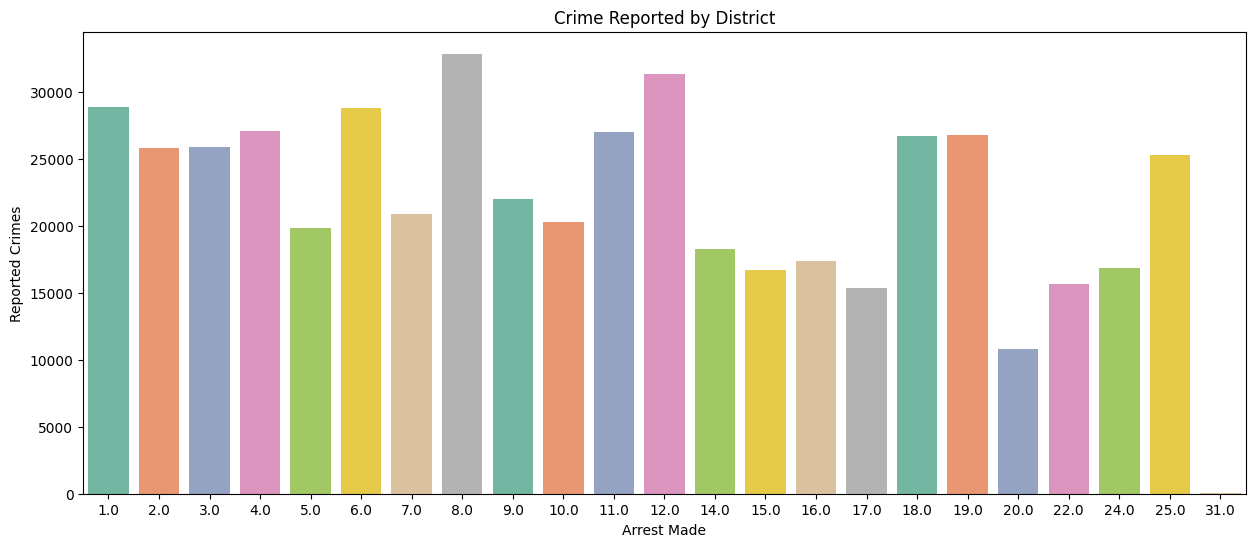

In [26]:
# reported crime by police district


district_report=sample_df.groupby("District")["ID"].count().reset_index(name="Total_Reported_Crime")
district_report=district_report.sort_values(by="Total_Reported_Crime",ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(data=district_report,x="District",y="Total_Reported_Crime",palette="Set2")
plt.title("Crime Reported by District")
plt.xlabel("Arrest Made")
plt.ylabel("Reported Crimes")

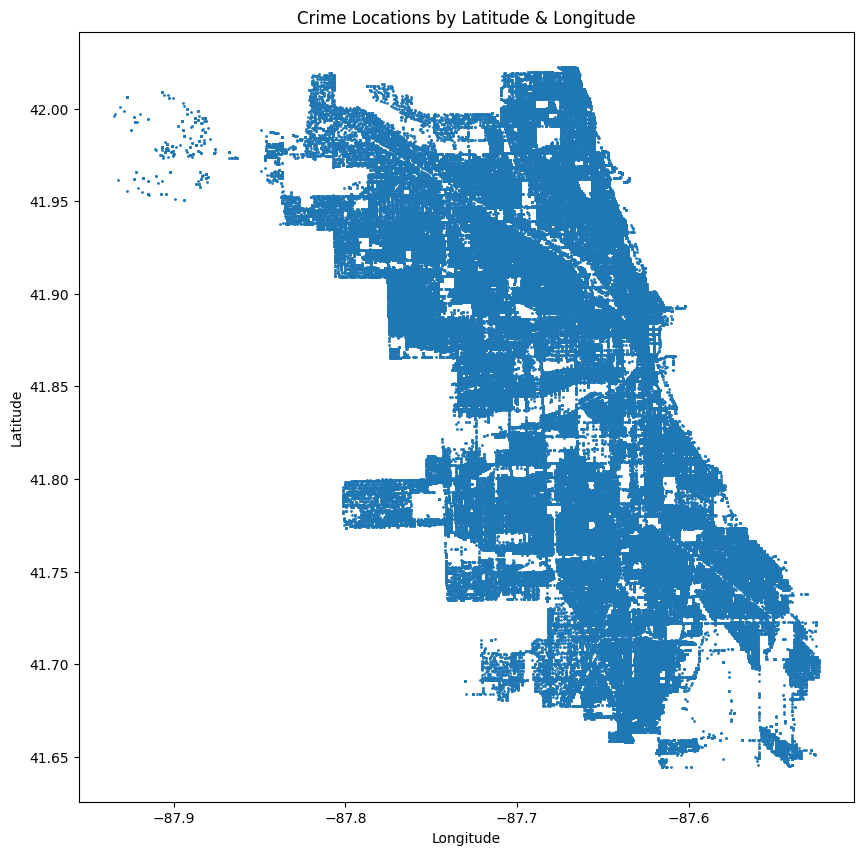

In [27]:
# crime locations by latitude and longitude

plt.figure(figsize=(10,10))
plt.scatter(
    sample_df['Longitude'],
    sample_df['Latitude'],s=1
)
plt.title("Crime Locations by Latitude & Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


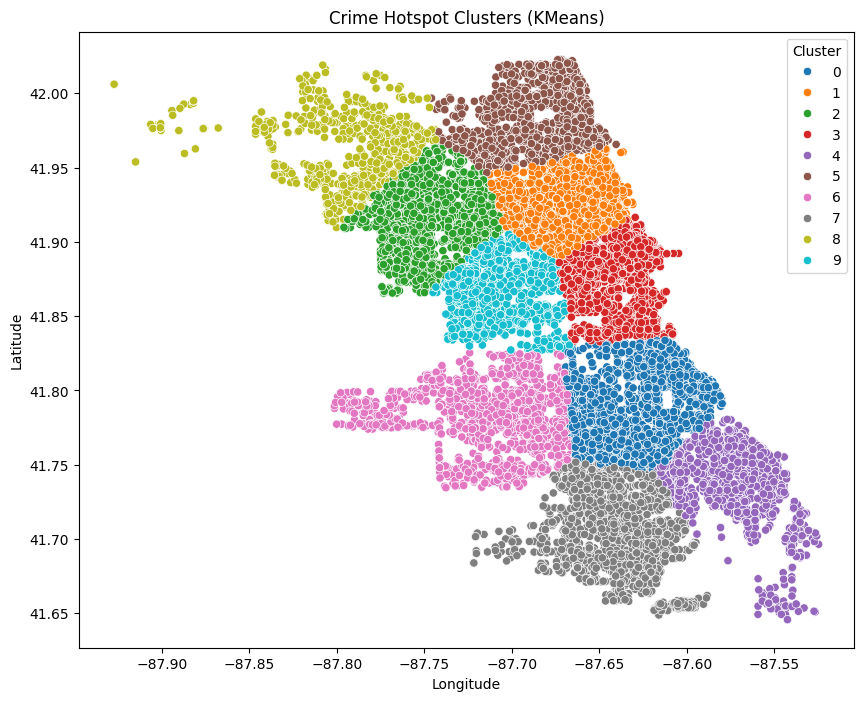

In [28]:
# using k means for crime hotspot

from sklearn.cluster import KMeans

coords = sample_df[['Latitude', 'Longitude']].dropna()

kmeans = KMeans(n_clusters=10, random_state=0)
coords['Cluster'] = kmeans.fit_predict(coords)

plt.figure(figsize=(10,8))
sns.scatterplot(
    data=coords.sample(20000),  # sample to speed up
    x='Longitude', y='Latitude',
    hue='Cluster', palette='tab10'
)
plt.title("Crime Hotspot Clusters (KMeans)")
plt.show()


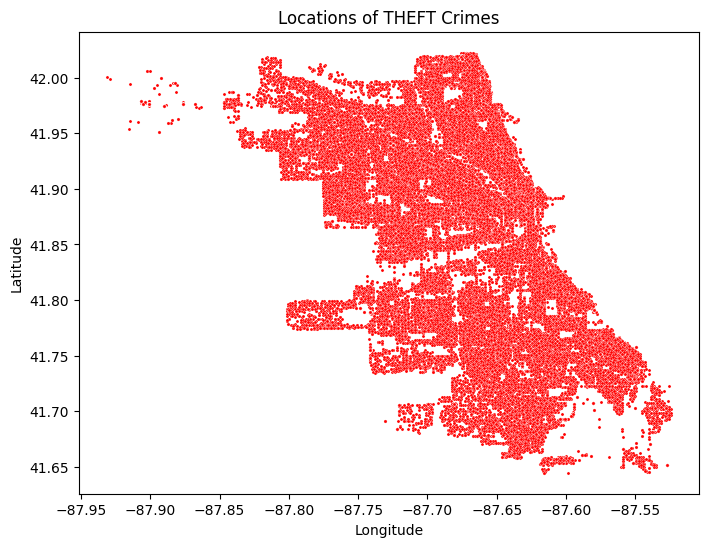

In [29]:
# crime type in certain locations


crime_type = sample_df[sample_df["Primary Type"] == "THEFT"]

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=crime_type,
    x='Longitude',
    y='Latitude',
    s=5,
    color='red'
)
plt.title("Locations of THEFT Crimes")
plt.show()


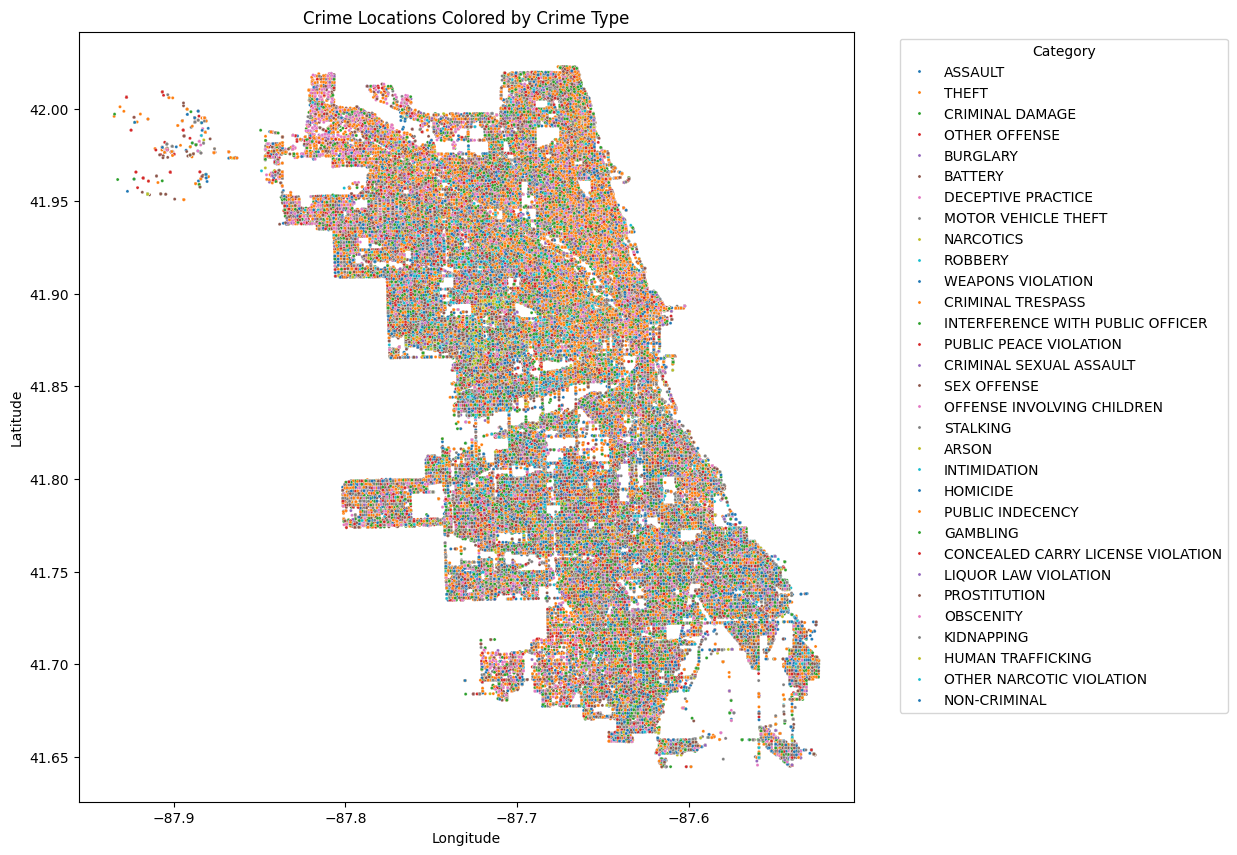

In [30]:
# all crime locations

plt.figure(figsize=(10,10))
sns.scatterplot(
    data=sample_df,
    x='Longitude',
    y='Latitude',
    hue='Primary Type',
    s=5,
    palette='tab10'
)
plt.title("Crime Locations Colored by Crime Type")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


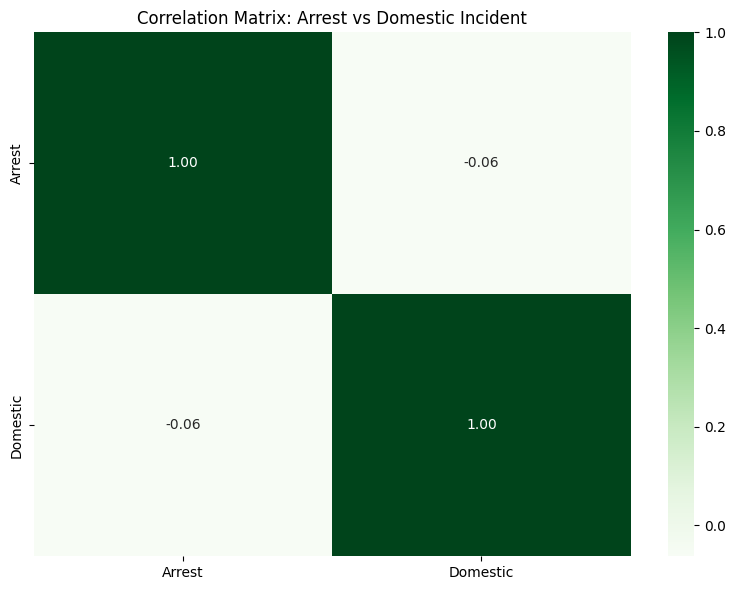

In [31]:
# Examine arrest rates and domestic incident correlations


corr = df[["Arrest", "Domestic"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="Greens", fmt=".2f")
plt.title("Correlation Matrix: Arrest vs Domestic Incident")
plt.tight_layout()
plt.show()


In [32]:
# creating hour day month columns



sample_df['Hour'] = sample_df['Date'].dt.hour
sample_df['DayOfWeek'] = sample_df['Date'].dt.day_name()
sample_df['Month'] = sample_df['Date'].dt.month_name()



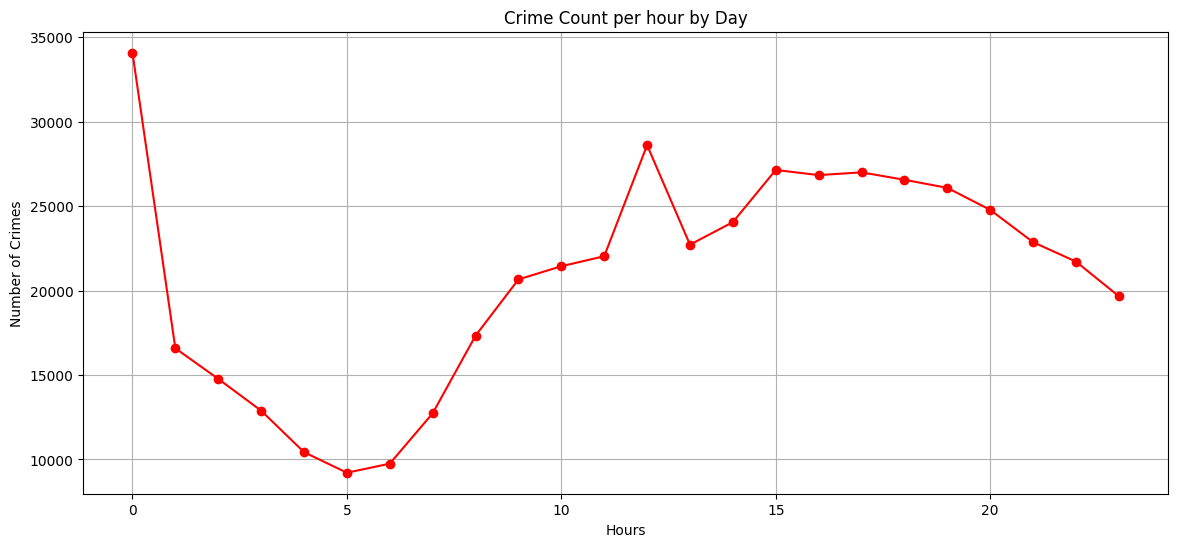

In [33]:
# hourly crime detect

plt.figure(figsize=(14,6))
sample_df['Hour'].value_counts().sort_index().plot(kind='line',color="red",marker='o')
plt.title("Crime Count per hour by Day")
plt.xlabel("Hours")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.show()


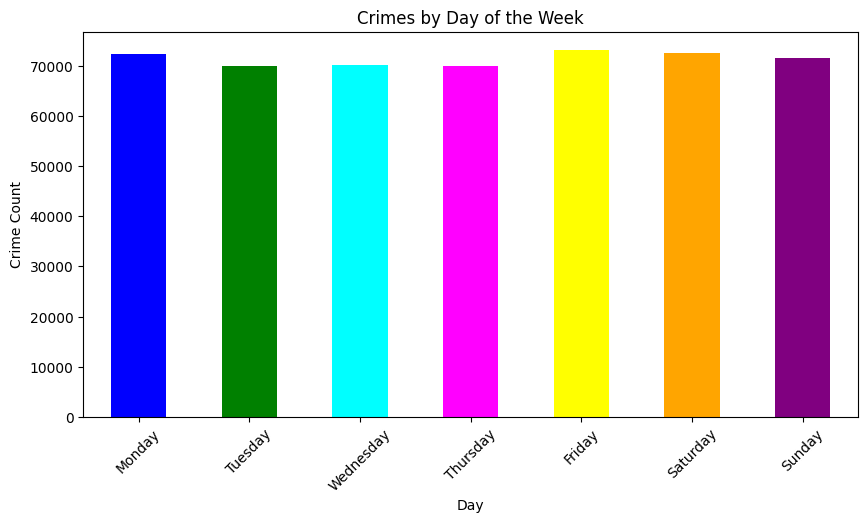

In [34]:
plt.figure(figsize=(10,5))
colors = ['blue', 'green', 'cyan', 'magenta', 'yellow', 'orange', 'purple']

sample_df['DayOfWeek'].value_counts().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).plot(kind='bar', color=colors)


plt.title("Crimes by Day of the Week")
plt.xticks(rotation=45)
plt.xlabel("Day")
plt.ylabel("Crime Count")
plt.show()


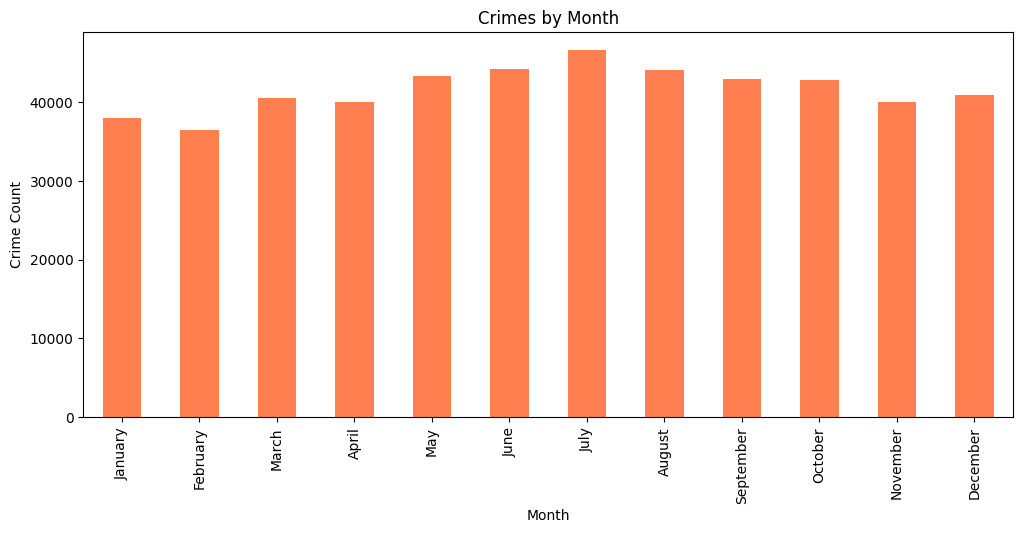

In [35]:
# crime rate in the month

plt.figure(figsize=(12,5))
sample_df['Month'].value_counts().reindex(
    ['January','February','March','April','May','June',
     'July','August','September','October','November','December']
).plot(kind='bar',color="coral")

plt.title("Crimes by Month")
plt.ylabel("Crime Count")
plt.show()


# Feature Engineering


In [36]:
# sample_df["weekend"]=sample_df["DayOfWeek"].map("Saturday":1
#                                                 ,"Sunday":1,
#                                                 "Monday":0,
#                                                 "Tuesday":0,
#                                                 "Wednesday":0,
#                                                 'Thursday':0,
#                                                 'Friday':0)

#weekend
weekend_days = {"Saturday", "Sunday"}
sample_df["weekend"] = sample_df["DayOfWeek"].isin(weekend_days).astype(int)

# Season
def weather(m):
    if m in ["December",'January','February']:
        return "Winter"
    if m in ['March','April','May']:
        return "Spring"
    if m in ['June','July','August']:
        return "Summer"
    else:
        return "Autumn"
    
    
    

sample_df["season"]=sample_df["Month"].apply(weather)


In [37]:
# geograpical

coords = sample_df[['Latitude', 'Longitude']]

kmeans = KMeans(n_clusters=10, random_state=42)
sample_df['geo_cluster'] = kmeans.fit_predict(coords)


In [38]:
# crime severity scores based on crime type classification

severity_map = {
    "HOMICIDE": 5,
    "ASSAULT": 4,
    "ROBBERY": 4,
    "BURGLARY": 3,
    "THEFT": 2,
    "VANDALISM": 1,
}

sample_df['severity_score'] = sample_df['Primary Type'].map(severity_map)


In [39]:
#Apply categorical encoding for crime types and location descriptions


# : Unsupervised Learning - Clustering Analysis

In [40]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sample_df[['lat_norm', 'lon_norm']] = scaler.fit_transform(sample_df[['Latitude', 'Longitude']])


In [41]:
coords_scaled=sample_df[['lat_norm', 'lon_norm']]

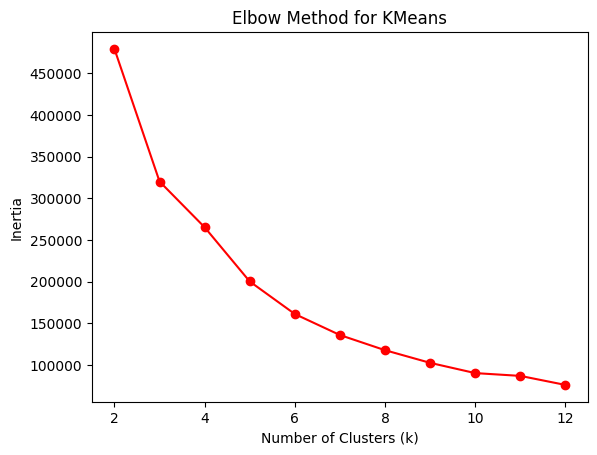

In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(2, 13)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(coords_scaled)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker='o',color="red")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.show()


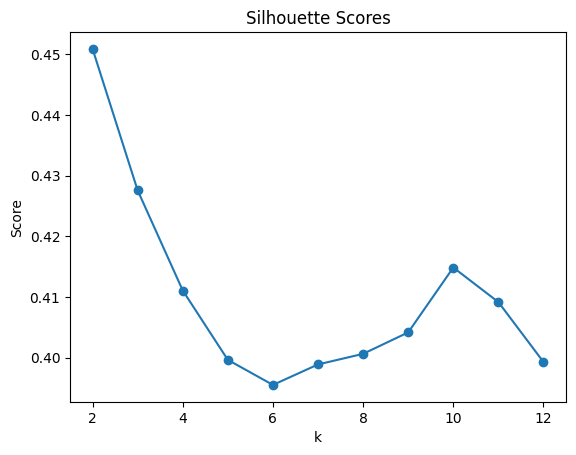

In [51]:
# 2) silhouette scores for the same range
from sklearn.metrics import silhouette_score, davies_bouldin_score


# Silhouette
sil_scores = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(coords_scaled)
    
    # sample for silhouette
    sil_data = coords_scaled.sample(frac=0.2, random_state=42)
    sil_labels = km.predict(sil_data)
    
    sil = silhouette_score(sil_data, sil_labels)
    sil_scores.append(sil)

plt.plot(K_range, sil_scores, '-o')
plt.title("Silhouette Scores")
plt.xlabel("k")
plt.ylabel("Score")
plt.show()

Best k: 2


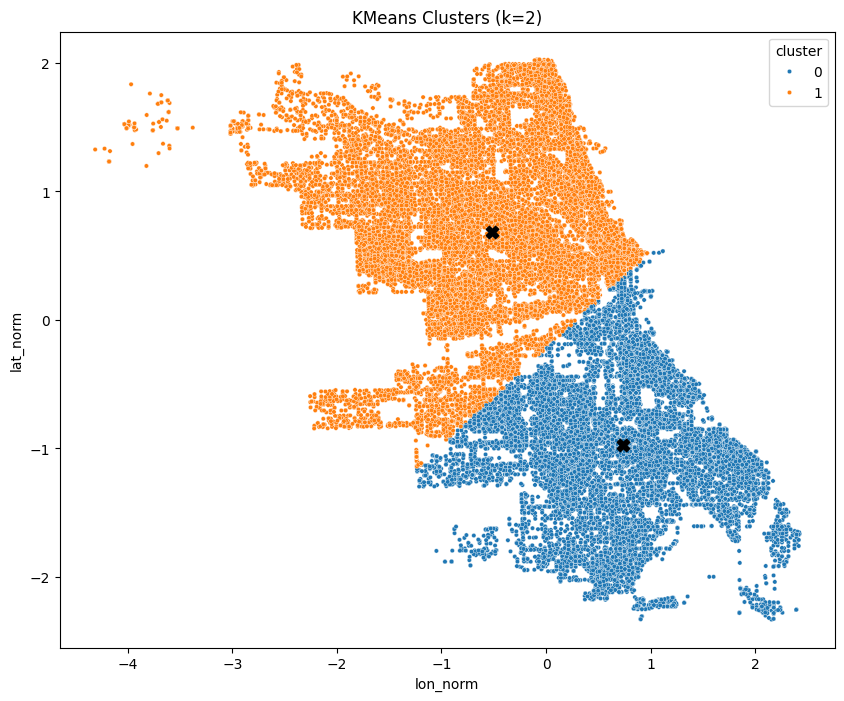

In [ ]:
# pick best k (highest silhouette or visually from elbow)
import numpy as np



# Best k
best_k = int(K_range[np.argmax(sil_scores)])
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10).fit(coords_scaled)
sample_df['kmeans_label'] = kmeans.labels_

print("Best k:", best_k)
# print("Silhouette:", silhouette_score(coords_scaled, kmeans.labels_))
# print("Davies-Bouldin:", davies_bouldin_score(coords_scaled, kmeans.labels_))


# Plot
plot_df = sample_df.sample(frac=0.1, random_state=0)

plt.figure(figsize=(10,8))
sns.scatterplot(data=plot_df, x='lon_norm', y='lat_norm',
                hue='kmeans_label', palette='tab10', s=10)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,1], centroids[:,0], c='black', s=80, marker='X')

plt.title(f"KMeans Clusters (k={best_k})")
plt.legend(title='cluster', loc='best')
plt.show()

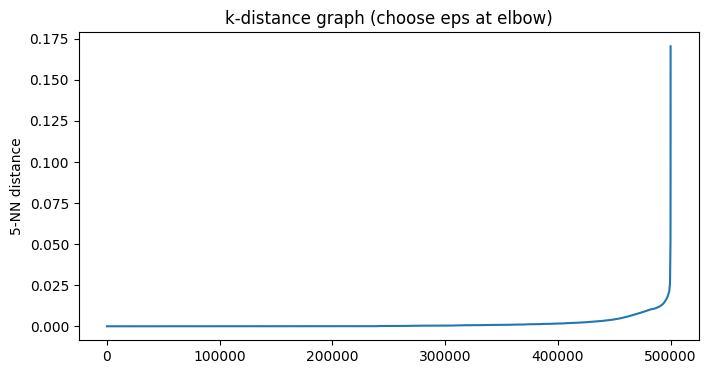

In [56]:
# DBSCAN for density-based spatial clustering with noise detection

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors

# 1) find reasonable eps via k-distance plot (k = min_samples)
min_samples = 5
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(coords_scaled)
distances, indices = nbrs.kneighbors(coords_scaled)
kdist = np.sort(distances[:, -1])  # k-distance (distance to k-th neighbor)
plt.figure(figsize=(8,4))
plt.plot(kdist)
plt.ylabel(f'{min_samples}-NN distance')
plt.title('k-distance graph (choose eps at elbow)')
plt.show()



In [58]:
#  try several eps/min_samples combos

coords_sub = coords_scaled.sample(frac=0.1, random_state=42)  # 50k

db_results = {}
for eps in [0.01, 0.02, 0.05, 0.08, 0.1, 0.2]:
    for ms in [3,5,8,12]:
        db = DBSCAN(eps=eps, min_samples=ms).fit(coords_sub)
        labels = db.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters <= 1:
            continue
        
        sil = silhouette_score(coords_sub, labels)
        dbi = davies_bouldin_score(coords_sub, labels)
        
        db_results[(eps,ms)] = {
            'n_clusters': n_clusters,
            'sil': sil,
            'dbi': dbi
        }


In [61]:
# inspect top results by silhouette

results_df = pd.DataFrame([
    {'eps':k[0], 'min_samples':k[1], **v} for k,v in db_results.items()
]).sort_values('sil', ascending=False).head(10)
print(results_df)


     eps  min_samples  n_clusters       sil       dbi
20  0.20            3           2  0.550866  2.707209
21  0.20            5           2  0.550866  2.707209
22  0.20            8           2  0.550866  2.707209
23  0.20           12           2  0.540870  1.867129
19  0.10           12           7  0.230126  1.111891
0   0.01            3        5394  0.197290  1.441485
16  0.10            3           9  0.114466  1.490400
17  0.10            5           9  0.114455  1.496963
18  0.10            8           9  0.032168  1.380961
13  0.08            5          12 -0.079678  1.652353


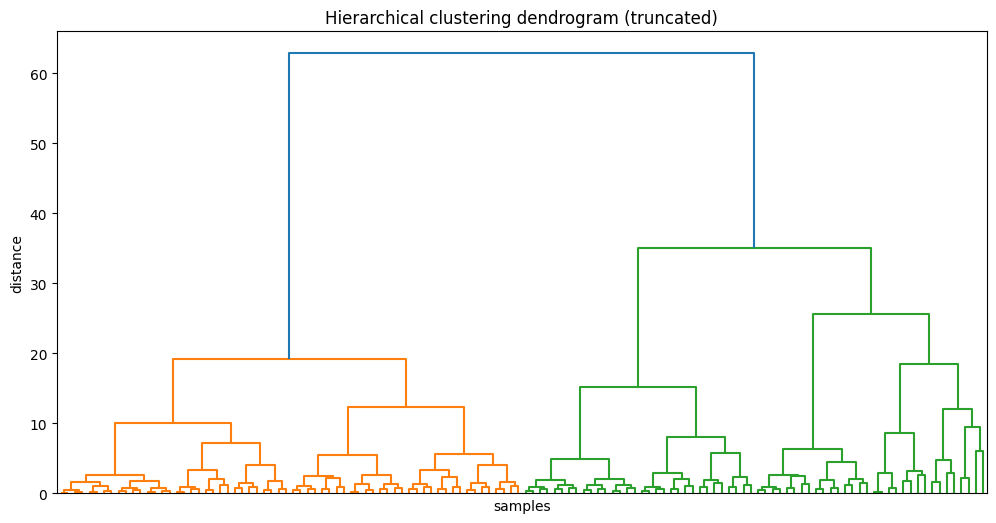

In [63]:
# Hierarchical Clustering for nested geographic area analysis



from scipy.cluster.hierarchy import linkage, dendrogram
import joblib  # for saving models



# linkage and dendrogram - be careful with very large n
subsample = sample_df.sample(n=2000, random_state=1) if len(sample_df)>2000 else sample_df
Z = linkage(subsample[['lat_norm','lon_norm']].values, method='ward')

plt.figure(figsize=(12,6))
dendrogram(Z, truncate_mode='level', p=6, no_labels=True)  # truncate for clarity
plt.title('Hierarchical clustering dendrogram (truncated)')
plt.xlabel('samples')
plt.ylabel('distance')
plt.show()

In [ ]:
# Evaluation summary

summary = []

# KMeans
k_labels = sample_df['kmeans_label'].values
summary.append({
    'method':'kmeans',
    'params': f'k={best_k}',
    'n_clusters': len(np.unique(k_labels)),
    'silhouette': silhouette_score(coords_scaled, k_labels),
    'davies_bouldin': davies_bouldin_score(coords_scaled, k_labels)
})

# DBSCAN (use chosen best_cfg)
db_labels = sample_df['dbscan_label'].values
n_db_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
summary.append({
    'method':'dbscan',
    'params': f'eps={eps_best}, min_samples={ms_best}',
    'n_clusters': n_db_clusters,
    'silhouette': silhouette_score(coords_scaled, db_labels) if n_db_clusters>1 else np.nan,
    'davies_bouldin': davies_bouldin_score(coords_scaled, db_labels) if n_db_clusters>1 else np.nan
})

# Hierarchical
hc_labels = sample_df['hc_label'].values
summary.append({
    'method':'hierarchical',
    'params': f'n_clusters={n_clusters_h}',
    'n_clusters': len(np.unique(hc_labels)),
    'silhouette': silhouette_score(coords_scaled, hc_labels),
    'davies_bouldin': davies_bouldin_score(coords_scaled, hc_labels)
})

summary_df = pd.DataFrame(summary).sort_values('silhouette', ascending=False)
print(summary_df)


In [65]:
# saving for deployment

joblib.dump(kmeans, 'kmeans_best.joblib')
sample_df.to_csv('crime_clusters_with_labels.csv', index=False)
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=['lat_norm','lon_norm'])
centroids_df.to_csv('kmeans_centroids.csv', index=False)


In [69]:
sample_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,DayOfWeek,Month,weekend,season,geo_cluster,severity_score,lat_norm,lon_norm,kmeans_cluster,kmeans_label
0,14020403,JJ477662,2025-11-04,091XX S ESSEX AVE,0560,ASSAULT,SIMPLE,RESIDENCE,False,True,...,Tuesday,November,0,Autumn,1,4.0,-1.358579,1.780702,1,0
1,14018617,JJ476833,2025-11-04,064XX S MOBILE AVE,0810,THEFT,OVER $500,DRIVEWAY - RESIDENTIAL,False,False,...,Tuesday,November,0,Autumn,5,2.0,-0.826129,-1.868006,0,1
2,14018572,JJ476729,2025-11-04,066XX S WOODLAWN AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE,False,False,...,Tuesday,November,0,Autumn,1,NaN,-0.838480,1.226691,1,0
3,14018432,JJ476549,2025-11-04,002XX E 71ST ST,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,False,...,Tuesday,November,0,Autumn,9,NaN,-0.938171,0.828250,1,0
4,14020159,JJ478541,2025-11-04,013XX S MICHIGAN AVE,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,Tuesday,November,0,Autumn,3,NaN,0.209620,0.751638,1,0


In [71]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    500000 non-null  int64         
 1   Case Number           500000 non-null  object        
 2   Date                  500000 non-null  datetime64[ns]
 3   Block                 500000 non-null  object        
 4   IUCR                  500000 non-null  object        
 5   Primary Type          500000 non-null  object        
 6   Description           500000 non-null  object        
 7   Location Description  500000 non-null  object        
 8   Arrest                500000 non-null  bool          
 9   Domestic              500000 non-null  bool          
 10  Beat                  500000 non-null  int64         
 11  District              500000 non-null  float64       
 12  Ward                  500000 non-null  float64       
 13 

# Unsupervised Learning – Dimensionality Reduction

In [77]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Select your 22+ columns (example shown for 5)
num_cols = ["Beat","District","lat_norm","lon_norm","kmeans_label"]

# 2. Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(sample_df[num_cols])

# 3. PCA with all components
pca = PCA(n_components=None)
pca.fit(X_scaled)

# 4. Variance explained
explained_var = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_var)
print("Cumulative Variance:", explained_var.cumsum())

# 5. Find components for 70–80% variance
cum_var = explained_var.cumsum()
n_components_70 = np.argmax(cum_var >= 0.70) + 1
n_components_80 = np.argmax(cum_var >= 0.80) + 1

print("Components needed for 70% variance:", n_components_70)
print("Components needed for 80% variance:", n_components_80)

# 6. Fit PCA with chosen number (say 3)
pca_final = PCA(n_components=3)
X_pca = pca_final.fit_transform(X_scaled)

sample_df['PC1'], sample_df['PC2'], sample_df['PC3'] = X_pca.T

# 7. Loadings
loading_scores = pd.DataFrame(
    pca_final.components_.T,
    columns=['PC1','PC2','PC3'],
    index=num_cols
)

feature_importance = loading_scores.abs().sum(axis=1).sort_values(ascending=False)
top5_features = feature_importance.head(5)

print("\nTop 5 Features Driving Crime Patterns:")
print(top5_features)


Explained Variance Ratio: [7.22198792e-01 1.40378204e-01 1.03781884e-01 3.36054050e-02
 3.57150849e-05]
Cumulative Variance: [0.72219879 0.862577   0.96635888 0.99996428 1.        ]
Components needed for 70% variance: 1
Components needed for 80% variance: 2

Top 5 Features Driving Crime Patterns:
lon_norm        1.578063
lat_norm        1.265626
kmeans_label    1.175982
Beat            1.011736
District        1.010824
dtype: float64


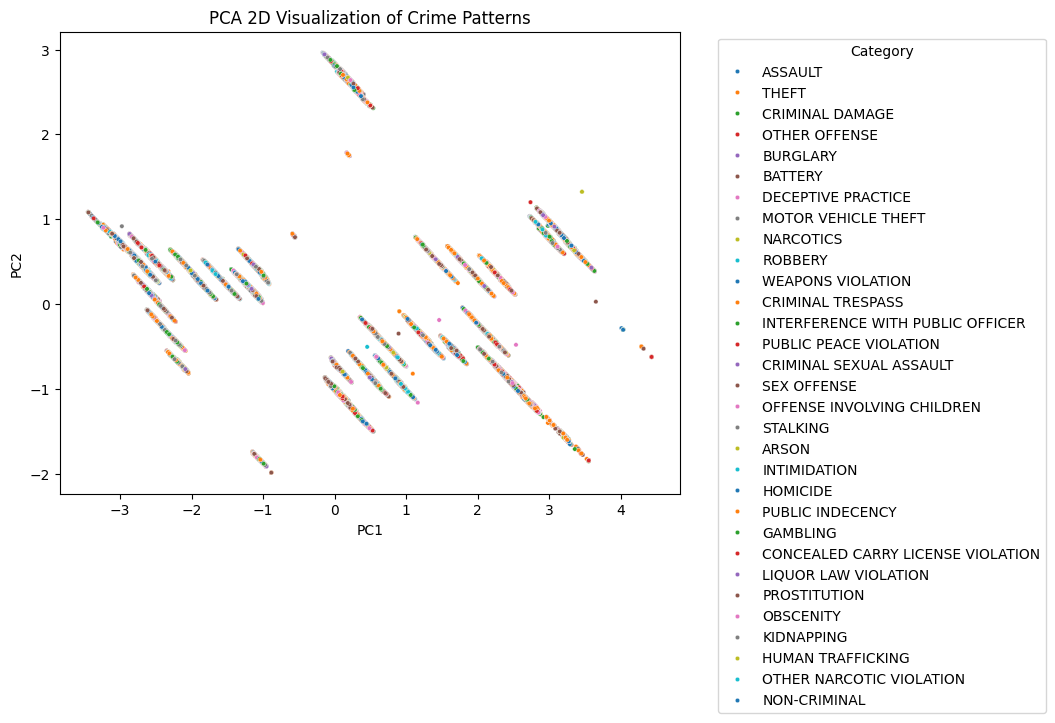

In [82]:
# visualizing 2D

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=sample_df, hue='Primary Type', s=10, palette='tab10')
plt.title("PCA 2D Visualization of Crime Patterns")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [83]:
# take only the top 5 crime categories
top_types = sample_df['Primary Type'].value_counts().head(5).index
plot_df = sample_df[sample_df['Primary Type'].isin(top_types)]


C:\Users\offic\AppData\Local\Temp\ipykernel_13960\1788691346.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['crime_code'] = le.fit_transform(plot_df['Primary Type'])


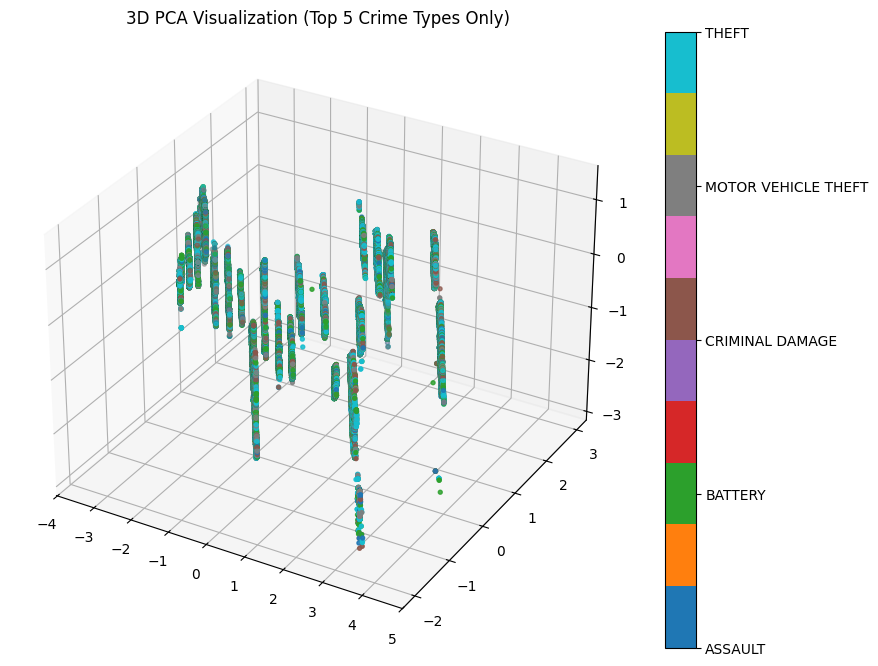

In [84]:
# VISUALIZING 3D
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Encode crime type only for filtered data
le = LabelEncoder()
plot_df['crime_code'] = le.fit_transform(plot_df['Primary Type'])

# 3D Plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    plot_df['PC1'],
    plot_df['PC2'],
    plot_df['PC3'],
    c=plot_df['crime_code'],
    cmap='tab10',
    s=8
)

# legend
cbar = plt.colorbar(scatter)
cbar.set_ticks(range(len(le.classes_)))
cbar.set_ticklabels(le.classes_)

ax.set_title("3D PCA Visualization (Top 5 Crime Types Only)")
plt.show()


# t-SNE

In [86]:
# t-SNE or UMAP for 2D visualization of high-dimensional crime patterns
from sklearn.manifold import TSNE

sample_tsne = sample_df.sample(n=20000, random_state=42)   # 20k rows only

X_small = scaler.fit_transform(sample_tsne[num_cols])

tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', random_state=42)
X_tsne = tsne.fit_transform(X_small)

sample_tsne['TSNE1'] = X_tsne[:,0]
sample_tsne['TSNE2'] = X_tsne[:,1]





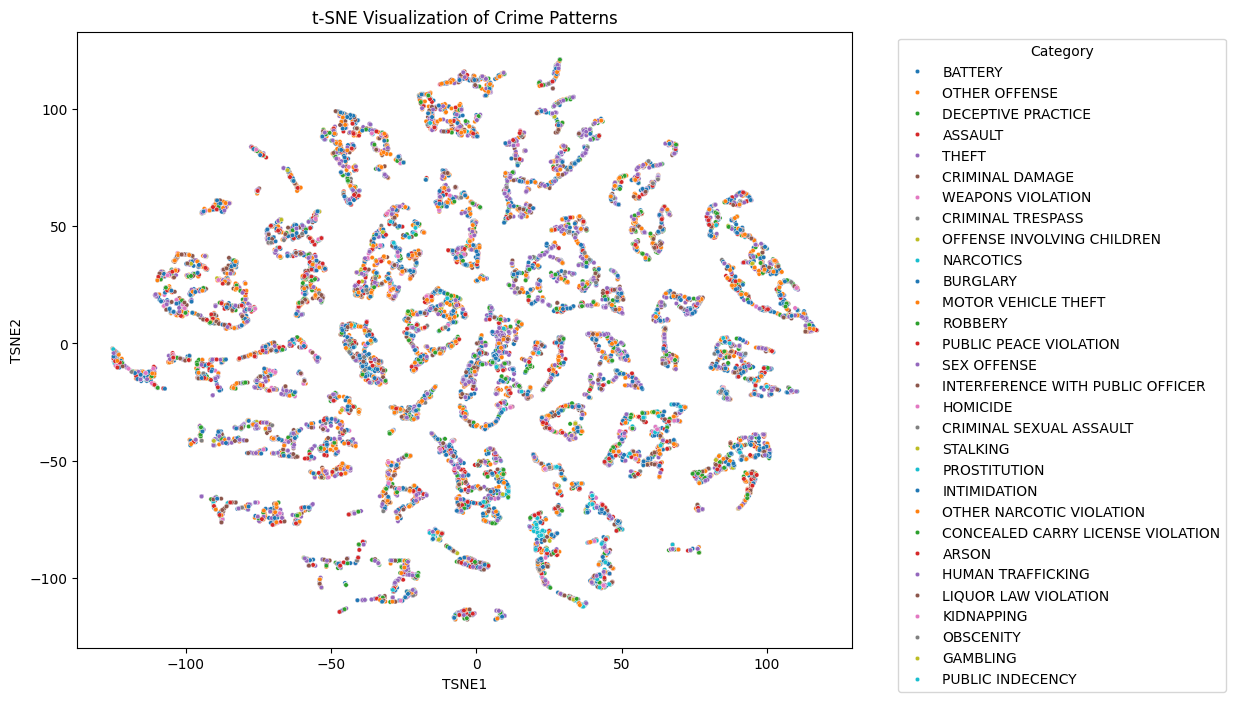

In [90]:
# Visualize t-SNE

plt.figure(figsize=(10,8))
sns.scatterplot(data=sample_tsne, x='TSNE1', y='TSNE2',
                hue='Primary Type', s=10, palette='tab10')
plt.title("t-SNE Visualization of Crime Patterns")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [93]:
sample_df.to_csv("sample_df.csv", index=False)


In [94]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 39 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    500000 non-null  int64         
 1   Case Number           500000 non-null  object        
 2   Date                  500000 non-null  datetime64[ns]
 3   Block                 500000 non-null  object        
 4   IUCR                  500000 non-null  object        
 5   Primary Type          500000 non-null  object        
 6   Description           500000 non-null  object        
 7   Location Description  500000 non-null  object        
 8   Arrest                500000 non-null  bool          
 9   Domestic              500000 non-null  bool          
 10  Beat                  500000 non-null  int64         
 11  District              500000 non-null  float64       
 12  Ward                  500000 non-null  float64       
 13 

# ML Flow

In [92]:
import os
import joblib
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import mlflow
from mlflow import sklearn as mlflow_sklearn
from mlflow.tracking import MlflowClient

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

# set tracking URI (point to your running server)
mlflow.set_tracking_uri("http://localhost:5000")
EXPERIMENT_NAME = "crime_clustering_dimred"
mlflow.set_experiment(EXPERIMENT_NAME)

def save_plot(fig, fname):
    fig.savefig(fname, bbox_inches='tight', dpi=150)
    plt.close(fig)


def run_experiment(sample_df, X, feature_columns,
                   method="kmeans",
                   k=5,
                   dbscan_eps=0.05,
                   dbscan_min_samples=5,
                   run_tsne=True,
                   run_pca_components=3,
                   experiment_tags=None):
    """
    Run a clustering + dim-reduction experiment and log to MLflow.

    - sample_df: pandas DF
    - X: numpy array (n_samples, n_features) scaled
    - feature_columns: list of feature names
    """
    with mlflow.start_run() as run:
        run_id = run.info.run_id
        print("MLflow run_id:", run_id)

        # tags
        if experiment_tags:
            mlflow.set_tags(experiment_tags)

        # common params
        mlflow.log_param("method", method)
        mlflow.log_param("n_samples", X.shape[0])
        mlflow.log_param("n_features", X.shape[1])

        labels = None
        model = None

        # ---------- CLUSTERING ----------
        if method == "kmeans":
            mlflow.log_param("k", k)
            model = KMeans(n_clusters=k, random_state=42, n_init=10)
            labels = model.fit_predict(X)
            mlflow_sklearn.log_model(model, artifact_path="kmeans_model")
            mlflow.log_param("init", "k-means++")
        elif method == "dbscan":
            mlflow.log_param("eps", dbscan_eps)
            mlflow.log_param("min_samples", dbscan_min_samples)
            model = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)
            labels = model.fit_predict(X)
            # DBSCAN does not have a straightforward sklearn model to save for reuse,
            # but we save the parameters and the labels as artifact
            joblib.dump({"eps":dbscan_eps,"min_samples":dbscan_min_samples}, "dbscan_params.pkl")
            mlflow.log_artifact("dbscan_params.pkl", artifact_path="dbscan_model")
        elif method == "hierarchical":
            mlflow.log_param("n_clusters", k)
            model = AgglomerativeClustering(n_clusters=k, linkage='ward')
            labels = model.fit_predict(X)
            joblib.dump(model, "hc_model.joblib")
            mlflow.log_artifact("hc_model.joblib", artifact_path="hc_model")
        else:
            raise ValueError("Unknown method")

        # ---------- EVALUATION ----------
        # count clusters (exclude noise label -1)
        unique_labels = set(labels.tolist())
        n_clusters = len([l for l in unique_labels if l != -1])
        mlflow.log_metric("n_clusters", n_clusters)

        if n_clusters > 1:
            sil = silhouette_score(X, labels)
            dbi = davies_bouldin_score(X, labels)
            mlflow.log_metric("silhouette", float(sil))
            mlflow.log_metric("davies_bouldin", float(dbi))
        else:
            mlflow.log_metric("silhouette", float("nan"))
            mlflow.log_metric("davies_bouldin", float("nan"))

        # save labels as artifact (CSV)
        out_df = sample_df.copy()
        out_df['cluster_label'] = labels
        fname_labels = f"cluster_labels_{run_id}.csv"
        out_df.to_csv(fname_labels, index=False)
        mlflow.log_artifact(fname_labels, artifact_path="labels")

        # ---------- DIMENSIONALITY REDUCTION (PCA) ----------
        if run_pca_components:
            pca = PCA(n_components=run_pca_components, random_state=42)
            X_pca = pca.fit_transform(X)
            # explained variance
            explained = pca.explained_variance_ratio_.tolist()
            mlflow.log_metric("pca_explained_var_pc1", float(explained[0]))
            mlflow.log_metric("pca_cumvar_3", float(np.sum(explained)))
            # top feature loadings
            loadings = pd.DataFrame(pca.components_.T, index=feature_columns,
                                    columns=[f"PC{i+1}" for i in range(run_pca_components)])
            loadings_file = f"pca_loadings_{run_id}.csv"
            loadings.to_csv(loadings_file)
            mlflow.log_artifact(loadings_file, artifact_path="pca")

            # save PCA model
            joblib.dump(pca, "pca_model.joblib")
            mlflow.log_artifact("pca_model.joblib", artifact_path="pca")

            # 2D scatter (PC1 vs PC2) colored by cluster
            fig, ax = plt.subplots(figsize=(8,6))
            sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='tab10', s=10)
            ax.set_title("PCA PC1 vs PC2")
            pca_png = f"pca_scatter_{run_id}.png"
            save_plot(fig, pca_png)
            mlflow.log_artifact(pca_png, artifact_path="plots")

       

        # ---------- save final sample_df with PC/TSNE columns ----------
        # attach PCA/TSNE to out_df if present
        if run_pca_components:
            out_df[['PC1','PC2'] + (['PC3'] if run_pca_components>2 else [])] = X_pca[:, :min(3, run_pca_components)]
        
        merged_fname = f"full_output_{run_id}.csv"
        out_df.to_csv(merged_fname, index=False)
        mlflow.log_artifact(merged_fname, artifact_path="outputs")

        # ---------- Return run info ----------
        return run.info


MlflowException: API request to http://localhost:5000/api/2.0/mlflow/experiments/get-by-name failed with exception HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /api/2.0/mlflow/experiments/get-by-name?experiment_name=crime_clustering_dimred (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000002276DF9C7C0>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [1]:
import pandas as pd
dff=pd.read_csv("sample_df.csv")
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 39 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    500000 non-null  int64  
 1   Case Number           500000 non-null  object 
 2   Date                  500000 non-null  object 
 3   Block                 500000 non-null  object 
 4   IUCR                  500000 non-null  object 
 5   Primary Type          500000 non-null  object 
 6   Description           500000 non-null  object 
 7   Location Description  500000 non-null  object 
 8   Arrest                500000 non-null  bool   
 9   Domestic              500000 non-null  bool   
 10  Beat                  500000 non-null  int64  
 11  District              500000 non-null  float64
 12  Ward                  500000 non-null  float64
 13  Community Area        500000 non-null  float64
 14  FBI Code              500000 non-null  object 
 15  